In [1]:
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import cohen_kappa_score

In [2]:
# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

In [3]:
# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

In [4]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)


In [5]:
# Apply SMOTE to your dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [6]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [7]:
# Initialize and fit the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [8]:
# Predict the target values on the test set
y_pred = svm_model.predict(X_test)

In [9]:
# Check the unique labels in y_test
unique_labels = set(y_test)
print("Unique Labels in y_test:", unique_labels)

Unique Labels in y_test: {10, 20}


In [10]:
# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=20)
recall = recall_score(y_test, y_pred, pos_label=20)
f1 = f1_score(y_test, y_pred, pos_label=20)
roc_auc = roc_auc_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

Confusion Matrix (Actual vs. Predicted):
            Predicted 10  Predicted 20
Actual 10          1252            75
Actual 20            25          1320


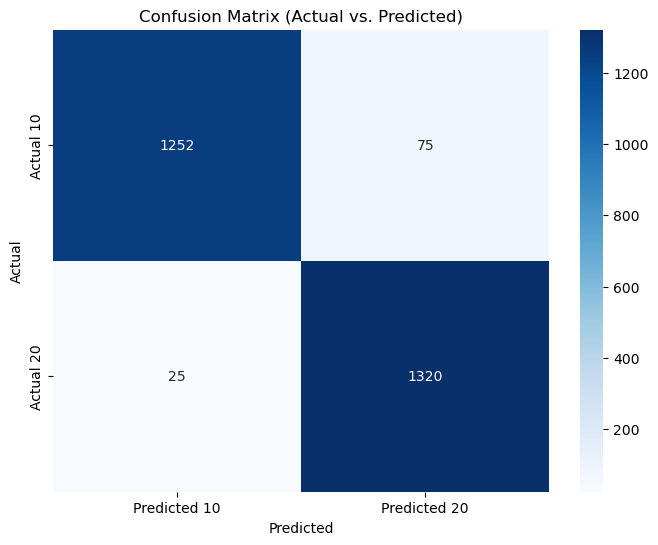

In [12]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a labeled confusion matrix
confusion_matrix_test = pd.DataFrame(conf_matrix, columns=["Predicted 10", "Predicted 20"], index=["Actual 10", "Actual 20"])

# Display the labeled confusion matrix
print("Confusion Matrix (Actual vs. Predicted):\n", confusion_matrix_test)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Actual vs. Predicted)")
plt.show()

In [13]:
# Classification Report
class_report = classification_report(y_test, y_pred)

In [14]:
# Given confusion matrix values
TP = 1252
FN = 75
FP = 25
TN = 1320

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

In [15]:
# Print all the calculated metrics
print(f"Sensitivity (True Positive Rate): {sensitivity:.3f}")
print(f"Specificity (True Negative Rate): {specificity:.3f}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print(f"Kappa Statistics: {kappa}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Sensitivity (True Positive Rate): 0.943
Specificity (True Negative Rate): 0.981
Accuracy: 0.9625748502994012
Precision: 0.946236559139785
Recall: 0.9814126394052045
F1 Score: 0.9635036496350365
ROC AUC: 0.962447088353695
Kappa Statistics: 0.9251274262832997
Confusion Matrix:
[[1252   75]
 [  25 1320]]
Classification Report:
              precision    recall  f1-score   support

          10       0.98      0.94      0.96      1327
          20       0.95      0.98      0.96      1345

    accuracy                           0.96      2672
   macro avg       0.96      0.96      0.96      2672
weighted avg       0.96      0.96      0.96      2672



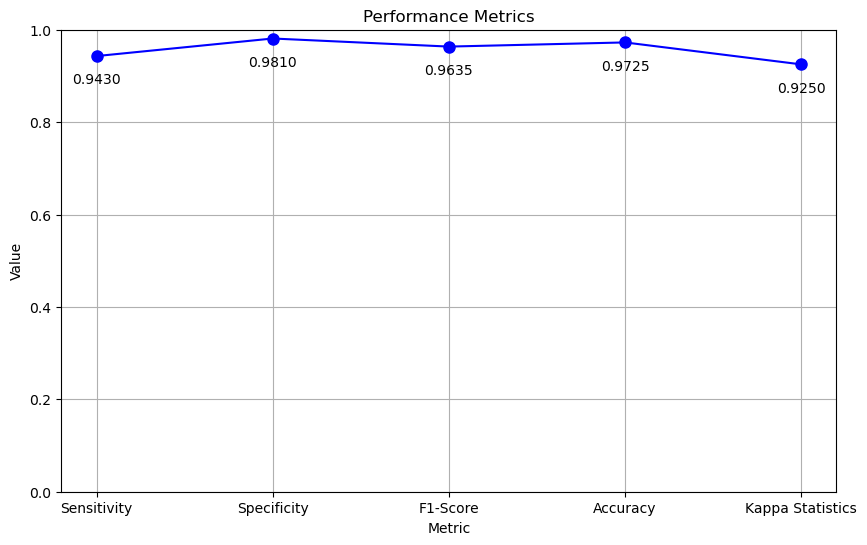

In [1]:
import matplotlib.pyplot as plt

# Define the metrics and their corresponding values
metrics = ['Sensitivity', 'Specificity', 'F1-Score', 'Accuracy', 'Kappa Statistics']
values = [0.943, 0.981, 0.9635, 0.9725, 0.925]

# Define a dark blue color
dark_blue = "#00008B"  # Hex color code for dark blue

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(metrics, values, marker='o', linestyle='-', color='b', markersize=8)
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, 1.0)  # Set the y-axis range to show values touching the top
plt.grid(True)

# Add labels below the data points
for i, value in enumerate(values):
    plt.annotate(f'{value:.4f}', (metrics[i], value), textcoords="offset points", xytext=(0, -20), ha='center')

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/SVM/line chart test data.svg", format='svg')


# Show the plot
plt.show()

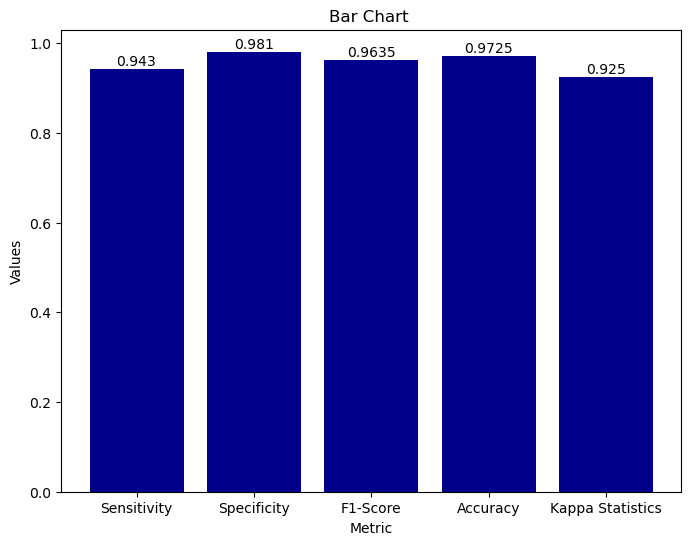

In [2]:
# Create a bar chart with dark blue color
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=dark_blue)

# Add labels and title
plt.xlabel("Metric")
plt.ylabel("Values")
plt.title("Bar Chart ")

# Add values at the middle of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/SVM/bar chart test data.svg", format='svg')


# Show the plot
plt.show()
